In [101]:
import pandas as pd


In [102]:
df = pd.read_csv(r'C:\Users\AANCHAL\Desktop\ExcelR\Excelr Project 2\data\processed\final_resume.csv')
df

,role,text
0,React_Developer,Name: Ravali P \n\n ...
1,React_Developer,SUSOVAN BAG \nSeeking a challenging posi...
2,React_Developer,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...
3,React_Developer,HARIPRIYA BATTINA \nExperience as UI Developer...
4,React_Developer,KAMALAKAR REDDY. A \nLinked In: https://www.li...
...,...,...
74,Workday,Workday Integration Consultant\n\nName ...
75,Workday,Seeking suitable positions in Workday HCM as ...
76,Workday,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [103]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

# Download resources once
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text, spell_correct=False):
    if not isinstance(text, str):
        return ""

    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # 3. Remove stopwords
    words = [w for w in text.split() if w not in stop_words]

    # 4. Spell correction (optional, slow!)
    if spell_correct:
        words = [str(TextBlob(w).correct()) for w in words]

    # 5. Tokenize
    tokens = nltk.word_tokenize(" ".join(words))

    # 6. Stemming + Lemmatization
    processed = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(processed)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AANCHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AANCHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AANCHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [104]:
df['text_clean'] = df['text'].apply(lambda x: clean_text(x, spell_correct=False))

In [105]:
df

,role,text,text_clean
0,React_Developer,Name: Ravali P \n\n ...,name ravali p curriculum vitae specialization ...
1,React_Developer,SUSOVAN BAG \nSeeking a challenging posi...,susovan bag seeking challenging position field...
2,React_Developer,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,kanumuru deepak reddy career objective secure ...
3,React_Developer,HARIPRIYA BATTINA \nExperience as UI Developer...,haripriya battina experience ui developer reac...
4,React_Developer,KAMALAKAR REDDY. A \nLinked In: https://www.li...,kamalakar reddy linked httpswwwlinkedincominka...
...,...,...,...
74,Workday,Workday Integration Consultant\n\nName ...,workday integration consultant name sri krishn...
75,Workday,Seeking suitable positions in Workday HCM as ...,seeking suitable position workday hcm techno f...
76,Workday,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...,workday hcm fcm name kumar s role workday cons...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlub workday consultant 53 year expe...


In [106]:
clean_df = df[['text_clean', 'role']]

print(clean_df.head(1))

                                          text_clean             role
0  name ravali p curriculum vitae specialization ...  React_Developer


In [107]:
from collections import Counter
import nltk

# Combine both cleaned columns into one big list of words
all_words = " ".join(df['text_clean'] + " " + df['role']).split()

# Count frequencies
word_freq = Counter(all_words)

# Top 20 most common words
print(word_freq.most_common(20))


[('experience', 565), ('server', 467), ('application', 460), ('report', 432), ('peoplesoft', 367), ('using', 350), ('workday', 342), ('integration', 341), ('project', 305), ('data', 302), ('process', 272), ('database', 270), ('business', 252), ('system', 228), ('knowledge', 202), ('sql', 196), ('web', 192), ('client', 189), ('tool', 189), ('requirement', 189)]


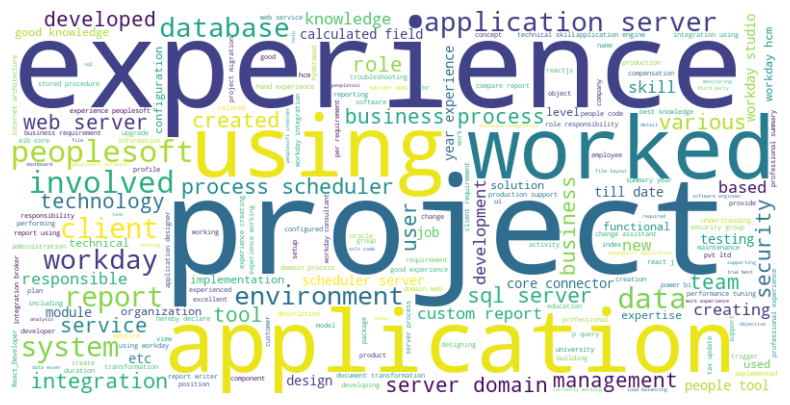

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from combined text
combined_text = " ".join(df['text_clean'] + " " + df['role'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [109]:
df.drop('text', axis=1, inplace=True)

In [110]:
df.head()

,role,text_clean
0,React_Developer,name ravali p curriculum vitae specialization ...
1,React_Developer,susovan bag seeking challenging position field...
2,React_Developer,kanumuru deepak reddy career objective secure ...
3,React_Developer,haripriya battina experience ui developer reac...
4,React_Developer,kamalakar reddy linked httpswwwlinkedincominka...


In [111]:
df['role'].value_counts()

role
React_Developer    24
Workday            21
Peoplesoft         20
SQL_Developer      14
Name: count, dtype: int64

to convert text to vector we have:
1. BagofWords
2. TF-IDF
3. Word2Vec
4. Glove
5. FastText
6. Sentence Transformer ( SBERT )

In [112]:
#pip uninstall -y sklearn


In [113]:
#pip install -U scikit-learn

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 5000)
x = tfidf.fit_transform(df['text_clean'])
y = df['role']

print(x.shape)

(79, 4365)


In [115]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

print(x_train.shape, x_test.shape)

(55, 4365) (24, 4365)


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'LinearSVC': LinearSVC(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, m in models.items():
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))


Logistic Regression
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         6
React_Developer       1.00      1.00      1.00         7
  SQL_Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         7

       accuracy                           1.00        24
      macro avg       1.00      1.00      1.00        24
   weighted avg       1.00      1.00      1.00        24


LinearSVC
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         6
React_Developer       1.00      1.00      1.00         7
  SQL_Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         7

       accuracy                           1.00        24
      macro avg       1.00      1.00      1.00        24
   weighted avg       1.00      1.00      1.00        24


Naive Bayes
                 precision    recall 

In [121]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

model = MultinomialNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=cv, scoring='f1_weighted')

print(f"CV F1 Scores: {scores}")
print(f"Mean: {scores.mean():.2f} | Std: {scores.std():.2f}")

CV F1 Scores: [0.93409091 0.9375     0.93472222 1.         0.86857143]
Mean: 0.93 | Std: 0.04


In [118]:
import joblib

model = MultinomialNB()
model.fit(x_train, y_train)

joblib.dump(model, 'resume_classifier.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved.")

Model and vectorizer saved.


Predict on unseen text

In [119]:
def predict_role(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)
    return prediction[0]

print('Role :', predict_role("experienced react developer with knowledge of redux hooks jsx"))
print('Role :', predict_role("peopletools sqr application designer component interface integration broker"))
print('Role :', predict_role("hcm implementation consultant business process configuration compensation talent management"))
print('Role :', predict_role("stored procedures queries database optimization joins indexing data warehouse"))

Role : React_Developer
Role : Peoplesoft
Role : Workday
Role : SQL_Developer
